<a href="https://colab.research.google.com/github/yeaeunJi/Algorithm_hackerrank/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 학습
- 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 이 챕터에서는 신경망이 학습할 수 있도록 해주는 지표인 '손실함수'가 나옴
  - 손실 함수의 최소 결과 값을 만드는 가중치 매개 변수를 찾는 것이 신경망 학습의 목표임
  - 손실 함수의 값을 가급적 작게 만드는 기법 중 함수의 기울기를 활용하는 경사법을 배울 것임
  

## 데이터에서 학습
- 신경망의 특징은 데이터를 보고 학습할 수 있다는 것이며, 이를 통해 가중치 매개 변수의 값을 자동으로 결정 가능

### 데이터 주도 학습
- 알고리즘을 밑바닥부터 설계하는 대신 주어진 데이터를 활용하는 방법 존재
  - 그 중 하나로 이미지에서 특징(feature)을 추출하고 그 특징의 패턴을 기계학습으로 기술하는 학습 방법이 있음 
    * feature : 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 의미
    - 이미지의 특징은 보통 벡터로 기술.
    - 이미지 데이터를 벡터로 변환 후 그 데이터를 가지고 지도 학습 방식의 대표 분류 기번인 SVN, KNN 등으로 학습할 수 있음
    - 사람이 생각한 특징을 사람이 설계하고 패턴 학습을 기계가 함
  - 신경망(딥러닝)은 이미지를 있는 그대로 학습하고, 이미지에 포함된 중요한 특징까지 기계가 스스로 학습함
    - 딥러닝을 종단간 기계학습(end-to-end machine learning, 입력에서 출력을 사람의 개입없이 얻음)라고 부르기도 함
    - 이점 : 모든 문제를 같은 맥락에서 해결 가능
        예) 개 사진 인식 == 사람 사진 인식 == 손글씨 '5' 인식

### 훈련 데이터와 시험 데이터
- 기계 학습에서는 데이터를 훈련 데이터(training data)와 시험 데이터(test data)로 나누어 학습과 실험을 수행하는 것이 일반적
  - 훈련 데이터를 통해 최적의 매개변수를 가진 모델을 만들고, 시험 데이터를 사용하여 훈련한 모델을 평가
  - 훈련 데이터로만 잘 작동되고 일반화되지 못하는 모델을 의미x

    (처음보는 데이터를 통해서도 원하는 목표를 이루어내야함)
 - 기계 학습에서 과대적합(overfitting)을 피하는 것이 중요한 과제 중 하나임
 * 과대 적합 : 한 데이터셋에만 너무 잘 맞게 학습되어 다른 새로운 데이터로 제대로 성과를 내지 못하는 경우



## 손실 함수(Loss function)
- 일반적으로 오차제곱합과 교차 엔트로피 오차를 사용
- 신경망 성능의 나쁨을 나타내는 지표 중 하나
  - 현재 신경망이 훈련 데이터를 얼마나 잘 처리하지 못했는가를 보여줌
  - 손실 함수에 -를 곱하면 '얼마나 좋은가'와 같은 지표로 변신 가능

### 오차제곱합(sum of squares for error, SSE)
- 각 원소의 출력(추정값)과 정답의 차를 제곱한 후 그 총합을 구하는 것
- 오차제곱합의 기준으로 오차가 더 작은 것이 정답에 더 가까울 것이라고 판단

In [1]:
import numpy as np 

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  #  신경망이 숫자 0 ~ 9까지 추론한 확률. 숫자 2일 확률이 가장 높다고 나옴
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 # 숫자 2 원핫인코딩

def sum_squares_error(y, t) :
  return 0.5*np.sum((y-t)**2)

print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  #  신경망이 숫자 0 ~ 9까지 추론한 확률. 숫자 2일 확률이 가장 높다고 나옴
print(sum_squares_error(np.array(y), np.array(t)))



0.09750000000000003
0.5975


### 교차 엔트로프 오차(cross entropy error, CEE)
- 정답일 때의 출력이 전체 값을 정함
- 정답에 해당하는 출력이 커질수록 0에 다가가다가, 출력이 1일 때 0이 됨



In [2]:
import numpy as np 
def cross_entropy_error(y,t) :
  delta = 1e-7 # np.log() 함수에 0을 입력할 경우, 마이너스 무한대를 뜻하는 -inf가 되어 계산x
  
  return -np.sum(t*np.log(y+delta)) 


y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]  #  신경망이 숫자 0 ~ 9까지 추론한 확률. 숫자 2일 확률이 가장 높다고 나옴
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 # 숫자 2 원핫인코딩

print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  #  신경망이 숫자 0 ~ 9까지 추론한 확률. 숫자 2일 확률이 가장 높다고 나옴
print(cross_entropy_error(np.array(y), np.array(t)))



0.510825457099338
2.302584092994546


### 미니배치 학습
- 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법
- 평균 손실 함수를 구하여 정규화함으로써 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있음

- 하지만 빅데이터와 같은 경우, 모든 데이터를 대상으로 일일이 손실함수를 계산하는 것은 시간이 많이 소요될 수 있음
  - 이럴 경우, 데이터의 일부로 전체의 근사치를 추론하여 사용해볼 수 있음
    - 미니배치(mini-batch) : 훈련 데이터로부터 무작위로 일부만 골라 학습 수행
    

In [3]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
import sys

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

__file__ = os.pardir
# print(__file__)
dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


# if __name__ == '__main__':
#     init_mnist()

# MNIST 데이터셋을 내려받아 그 이미지를 넘파이 배열로 변화해주는 파이썬 스크립트 사용
import sys, os
sys.path.append(os.pardir)
# from dataset.mnist import load_mnist
# load_mnist()

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [4]:
# 훈련 데이터에서 지정한 수의 데이터를 무작위로 추출하는 코드 구현
# 무작위로 10장만 
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 지정한 범위의 수중 무작위로 원하는 개수만 꺼냄 # 추출할 데이터의 인덱스로 사용
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)

[16323  1790 29252 42980 37943 48245 13256 29344 48634 46799]


In [5]:
# 무작위 추출된 인덱스로 미니배치 추출 후 손실함수도 미니 배치로 계산 가능

### (배치용) 교차 엔트로피 오차 구현하기

In [6]:
# 데이터가 하나일 때와 배치로 묶여 있는 경우 모두 처리할 수 있는 교차 엔트로피 오차 구현
def cross_entropy_error(y, t) :
  if y.ndim == 1 : # 데이터가 한개
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y+1e-7)) / batch_size # 배치 크기로 나누어 정규화하고, 이미지 1장당 평균 교차 엔트로피 오차를 계산

In [7]:
# 만약 정답 레이블이 원핫인코딩이 아닌 숫자 레이블이라면 다음과 같이 교차 엔트로피 오차를 구현 가능
def cross_entropy_error(y, t) :
  if y.ndim == 1 :
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  
  batch_size = y.shape[0] # 데이터 수
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size 
  # 핵심 : 원핫인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 그 계산 무시해도 좋다
  # ===> 정답에 해당하는 신경망의 출력만으로 계산 가능하다는 의미

### 손실 함수를 설정하는 이유는 무엇인가
  - 신경망 학습에서는 최적의 매개변수(가중치와 편향)을 탐색할 대 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는 것이 목표.
  - 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복하여 최적의 매개변수를 찾음
  - 어떤 한 신경망의 가중치 매개변수의 손실함수의 미분이란 '가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변화하는가'를 의미함
    - 미분 값 < 0 : 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값 감소
    - 미분 값 > 0 : 가중치 개매변수를 음의 방향으로 변화시켜 손실 함수의 값 감소
    - 미분 값 = 0 : 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않으므로 가중치 매개변수의 갱신 중지

- 정확도가 아닌 손실 함수의 값을 찾는 이유는 무엇일까?
  - 정확도를 지표로 삼을 경우, 매개변수의 미분이 대부분의 장소에서 0이 되어 매개변수 갱신을 할 수 없기 때문
    - 예) 한 신경망이 100장의 훈련 데이터 중 32장을 올바르게 인식
          정확도 : 32%
      
      가중치 매개변수의 값을 약간 조정해도 정확도는 바뀌지 않고 일정하게 유지되거나 혹은 연속적인 변화가 아닌 32 --> 33, 34%와 같이 불연속적인 값으로 바뀐다고 함...

    - 하지만, 손실 함수를 지표롤 삼을 경우, 매개 변수의 값이 조금 변화하면 그에 반응하여 손실 함수의 값도 연속적으로 변화함

  - 계단 함수를 미분할 경우, 대부분의 장소에서 0이되는 것과 비슷
  - 즉, 매개변수의 미세한 변화가 일으키는 것을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않음(시그모이드 함수의 기울기는 0이 아님)


## 수치 미분(numerical differentiation)
- 경사법에서는 기울기(경사) 값을 기준으로 나아갈 뱡향을 정함
- 수치 미분에는 오차가 포함되므로 함수의 차분을 게산하는 방법을 쓰기도 함
- 아주 작은 차분으로 미분하는 것(근사치로 계산)

- 해석적(analytic) 미분 : 수식을 통해 미분하는 것으로 오차를 포함하지 않는 진정한 미분을 계산(우리가 배운 미분하는 방법)

### 미분
- '특정 순간'의 변화량(어느 순간의 속도)
- x의 작은 변화가 함수 f(x)를 얼마나 변화시키는 가
 (시간인 h가 한없이 0에 가까워질정도의시간의 작은 변화일 때)

In [11]:
# 함수를 미분하는 계산 
def numerical_diff(f, x) :
  h = 10e-50 # h에 작은 값을 대입해 다음과 같이 계산 가능
  return (f(x+h)-f(x)) / h

In [12]:
# 1. 위에서 정의한 함수는 h를 정의한 방식에서 반올림 오차(rounding error)문제를 일으킴
# 반올림 오차 : 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기게 됨
import numpy as np
np.float32(1e-50)

0.0

In [13]:
# 따라서 좋은 결과를 준다고 알려진 미세한 값인 1e-4 사용


In [14]:
# 2. 함수 f의 차분(임의 두 점에서의 함수 값들의 차이)
# 진정한 의미에서의 미분은 x 위치의 함수의 길울기(접선)에 해당하지만 위에서 구현한 미분은 x+h와 X 사이의 기울기에 해당
# 이는 h를 무한히 0으로 좁히는 것이 불가능하여 생긴 문제
# 중심차분 혹은 중앙 차분 : x를 중심으로 그 전후의 차분을 계싼 . (x+h)와 (x-h)일 때의 함수 f의 차분을 계산
def numerical_diff(f, x) :
  h = 1e-4
  return (f(x+h)-f(x-h)) / (2*h)

### 수치 미분의 예
 y = 0.01(x**2) + 0.1x 구현

In [19]:
def function_1(x) :
  return 0.01*x**2 + 0.1*x

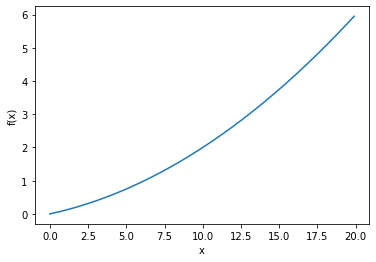

In [20]:

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0.0에서 20.0까지 0.1 간격으로 배열 x를 만든다(20미포함)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [21]:
# x = 5일 때와 10일 때 미분
print(numerical_diff(function_1, 5)) # x대한 f(x)의 변화량(기울기)
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 편미분
 f(x0, x1) = x0 ** 2 + x1 ** 2

 - 변수가 여럿인 함수에 대한 미분
 (x0에 대한 미분이냐 x1에 대한 미분이냐 구별 필요)

 - 변수가 하나인 미분과 동일하게 특정 장소의 기울기를 구하지만 여러 변수 중 목표 변수 하나만 살리고 나머지는 고정하여 계산

In [23]:
def function_2(x) :
  return x[0]**2 + x[1]**2
  # 또는 return np.sum(x**2)

In [24]:
# 이 식에 대한 그래프는 3차원으로 그려짐

In [26]:
# x0=3, x1 =4 일때 x0에 대한 편미분
def function_tmp1(x0) :
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [27]:
# x0=3, x1=4일 때 x1에 대한 편미분
def function_tmp2(x1) :
  return 0.3**2.0 + x1*x1
  
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 기울기(gradient)
- x0과 x1의 편미분을 동시에 계산하고 싶다면 어떻게 해야할까?
- 기울기 :모든 변수의 편미분을 벡터로 정리한 것
- 기울기는 각 지점에서 낮아지는 방향을 가리킴(기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향)

In [29]:
# x0=3, x1=4일 때 각 점에서의 기울기를 구하는 함수 구현
def numerical_gradient(f, x) :
  h = 1e-4 
  grad = np.zeros_like(x) # x와 형상(shape)이 같고 값은 0으로 채워진 배열을 생성

  for idx in range(x.size) :
    tmp_val = x[idx]
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1-fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원 

  return grad

In [31]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]
